In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls ../data/raw/

TsaThroughput.ANC.csv   TsaThroughput.FLL.csv   TsaThroughput.PHX.csv
TsaThroughput.ATL.csv   TsaThroughput.LAS.csv   TsaThroughput.SEA.csv
TsaThroughput.All.csv   TsaThroughput.LAX.csv   TsaThroughput.SFO.csv
TsaThroughput.BOI.csv   TsaThroughput.MCO.csv   TsaThroughput.SJC.csv
TsaThroughput.BZN.csv   TsaThroughput.MIA.csv   TsaThroughput.TPA.csv
TsaThroughput.DEN.csv   TsaThroughput.MSO.csv   TsaThroughput.Total.csv
TsaThroughput.DFW.csv   TsaThroughput.PDX.csv


In [3]:
airports_list = ['ANC', 'ATL', 'All', 'BOI', 'BZN', 'DEN', 'DFW', 'FLL', 'LAS', 'LAX', 
                 'MCO', 'MIA', 'PDX', 'PHX', 'SEA', 'SFO', 'SJC', 'TPA', 'Total']

In [4]:
df_list = []
  
for i in range(len(airports_list)):
    temp_df = pd.read_csv("../data/raw/TsaThroughput."+airports_list[i]+".csv")
    df_list.append(temp_df)

In [5]:
airport_dict =dict(zip(airports_list,df_list))

In [17]:
# Clean and plot a timeseries for a given airport

def make_airport_df(df, airport_name):
    '''For each airport, creates dataframe sets index to datetime, 
    sum over values for all gates drops unnecessary columns'''

    # Set index to datetime
    df.index = pd.to_datetime(df['Date'] + ' ' + df['Hour'])
    df = df.drop(columns=['Date', 'Hour'])
    
    # Sum across values from each gate to get total for a given date and time (up to the hour)
    df = pd.DataFrame(df.sum(axis=1))
    df.rename(columns={0:airport_name}, inplace=True)
    
    return df

In [18]:
def join_airports(airport_list):
    new=[]
    for airport in airport_list: 
        new.append(make_airport_df(airport_dict.get(airport), airport))
        airports = pd.concat(new, axis=1)
    return airports

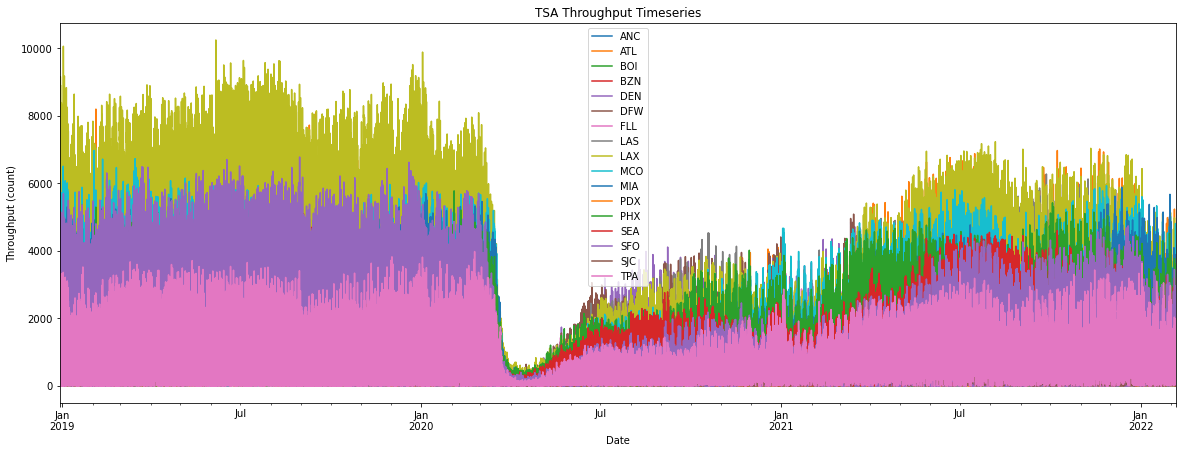

In [19]:
df = join_airports(airports_list[:-1])

fig, ax = plt.subplots(figsize=(20,7))
df.drop(columns=['All']).plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Throughput (count)')
ax.set_title('TSA Throughput Timeseries');

In [20]:
df.head()

,ANC,ATL,All,BOI,BZN,DEN,DFW,FLL,LAS,LAX,MCO,MIA,PDX,PHX,SEA,SFO,SJC,TPA
2018-12-30 00:00:00,115.0,11.0,5079.0,NaN,NaN,123.0,NaN,0.0,343.0,533.0,NaN,283.0,14.0,389.0,50.0,318.0,NaN,1.0
2018-12-30 01:00:00,14.0,14.0,2918.0,NaN,NaN,52.0,NaN,147.0,84.0,11.0,NaN,290.0,11.0,64.0,12.0,7.0,NaN,NaN
2018-12-30 02:00:00,29.0,10.0,3004.0,NaN,NaN,19.0,NaN,NaN,60.0,NaN,NaN,314.0,24.0,16.0,110.0,NaN,NaN,NaN
2018-12-30 03:00:00,115.0,216.0,19319.0,NaN,25.0,353.0,351.0,396.0,762.0,474.0,535.0,704.0,527.0,524.0,717.0,195.0,35.0,20.0
2018-12-30 04:00:00,305.0,1308.0,121141.0,483.0,331.0,3006.0,2140.0,3217.0,3189.0,3778.0,3501.0,1796.0,1778.0,1919.0,3114.0,2361.0,420.0,2267.0


In [21]:
df.shape

(27216, 18)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27216 entries, 2018-12-30 00:00:00 to 2022-02-05 23:00:00
Freq: H
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANC     26985 non-null  float64
 1   ATL     26513 non-null  float64
 2   All     27216 non-null  float64
 3   BOI     19626 non-null  float64
 4   BZN     17779 non-null  float64
 5   DEN     27186 non-null  float64
 6   DFW     24839 non-null  float64
 7   FLL     23792 non-null  float64
 8   LAS     27215 non-null  float64
 9   LAX     25785 non-null  float64
 10  MCO     24941 non-null  float64
 11  MIA     27211 non-null  float64
 12  PDX     27206 non-null  float64
 13  PHX     27215 non-null  float64
 14  SEA     27214 non-null  float64
 15  SFO     25581 non-null  float64
 16  SJC     20325 non-null  float64
 17  TPA     21527 non-null  float64
dtypes: float64(18)
memory usage: 3.9 MB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ANC,26985.0,210.573967,154.729967,0.0,95.00,180.0,287.0,1094.0
ATL,26513.0,2148.751198,1829.063290,0.0,267.00,1912.0,3609.0,8202.0
All,27216.0,64915.945216,54648.907345,33.0,10592.75,53846.0,115773.5,217927.0
BOI,19626.0,270.544966,199.508061,0.0,104.00,245.0,397.0,1292.0
BZN,17779.0,139.272962,128.619313,0.0,43.00,103.0,196.0,830.0
DEN,27186.0,1949.017527,1586.510462,0.0,393.00,1758.0,3328.0,6642.0
DFW,24839.0,1994.838661,1540.055232,0.0,440.00,1888.0,3265.0,6770.0
FLL,23792.0,1784.690232,1197.076639,0.0,653.00,1883.0,2743.0,5507.0
LAS,27215.0,1948.071835,1508.062165,0.0,466.50,1816.0,3158.0,6385.0
LAX,25785.0,3097.091061,2323.019113,0.0,992.00,2751.0,4928.0,10250.0


In [38]:
null_values = pd.DataFrame(df.isna().sum().sort_values(ascending=False), columns=['count'])

In [39]:
null_values['percent'] = round(df.isna().mean()*100, 2)

In [40]:
null_values

,count,percent
BZN,9437,34.67
BOI,7590,27.89
SJC,6891,25.32
TPA,5689,20.90
FLL,3424,12.58
DFW,2377,8.73
MCO,2275,8.36
SFO,1635,6.01
LAX,1431,5.26
ATL,703,2.58


In [42]:
df.duplicated().any()

False

In [95]:
df = df.fillna(0)

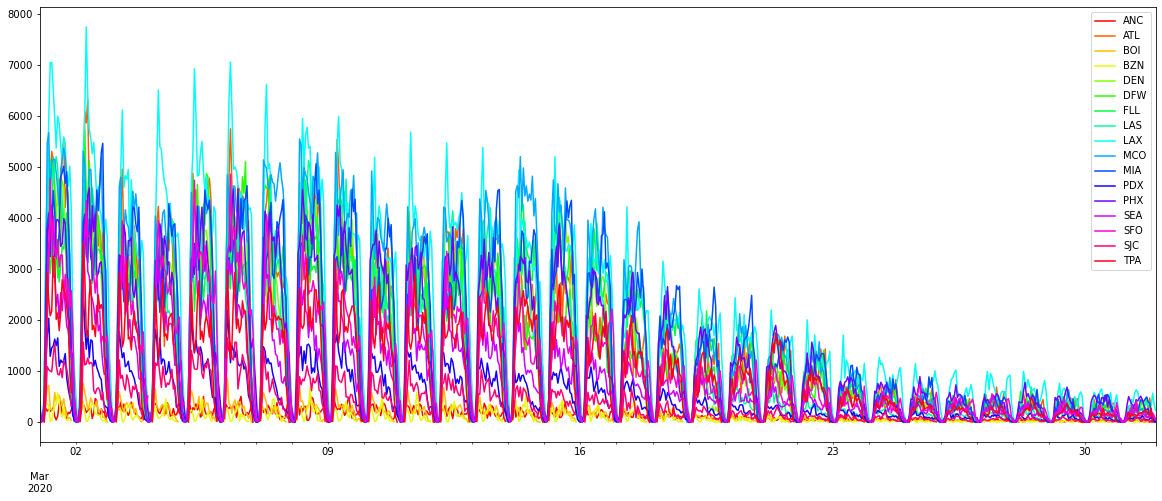

In [94]:
fig, ax = plt.subplots(figsize=(20,8))
df[airports_list[:-1]].loc['03-2020'].drop(columns=['All']).plot(ax=ax, cmap='hsv');